In [12]:
%matplotlib inline
import pfunk
import matplotlib.pyplot as plt
import numpy as np
import corner

In [4]:
fresco_path = '48Ca_elastic_new.in'
fresco_names = ['p1', 'p2', 'p3', 'p4', ('p5', 'p5'), ('p6', 'p6'), 'p4']
fresco_positions = [54, 55, 56, 57, (58, 66), (59, 67), 65]
elastic_data_path = '48Ca_p_p.dat'


In [6]:
model = pfunk.model.Model(fresco_path, fresco_names, fresco_positions) # create model
model.create_pot_prior(model.fresco.x0, model.fresco.x0) # 100% priors from global values
model.create_prior() # Finish setting up the prior functions

model.create_elastic_likelihood('fort.201', elastic_data_path)
model.create_likelihood()


In [7]:
sampler = pfunk.sampler.Sampler(model)

In [8]:
sampler.run_nested()

8324it [7:05:14,  3.07s/it, +250 | bound: 203 | nc: 1 | ncall: 1416350 | eff(%):  0.605 | loglstar:   -inf <  3.893 <    inf | logz: -24.725 +/-  0.450 | dlogz:  0.000 >  0.010]


In [11]:
s = pfunk.utilities.make_samples_dynesty(sampler.sampler.results)

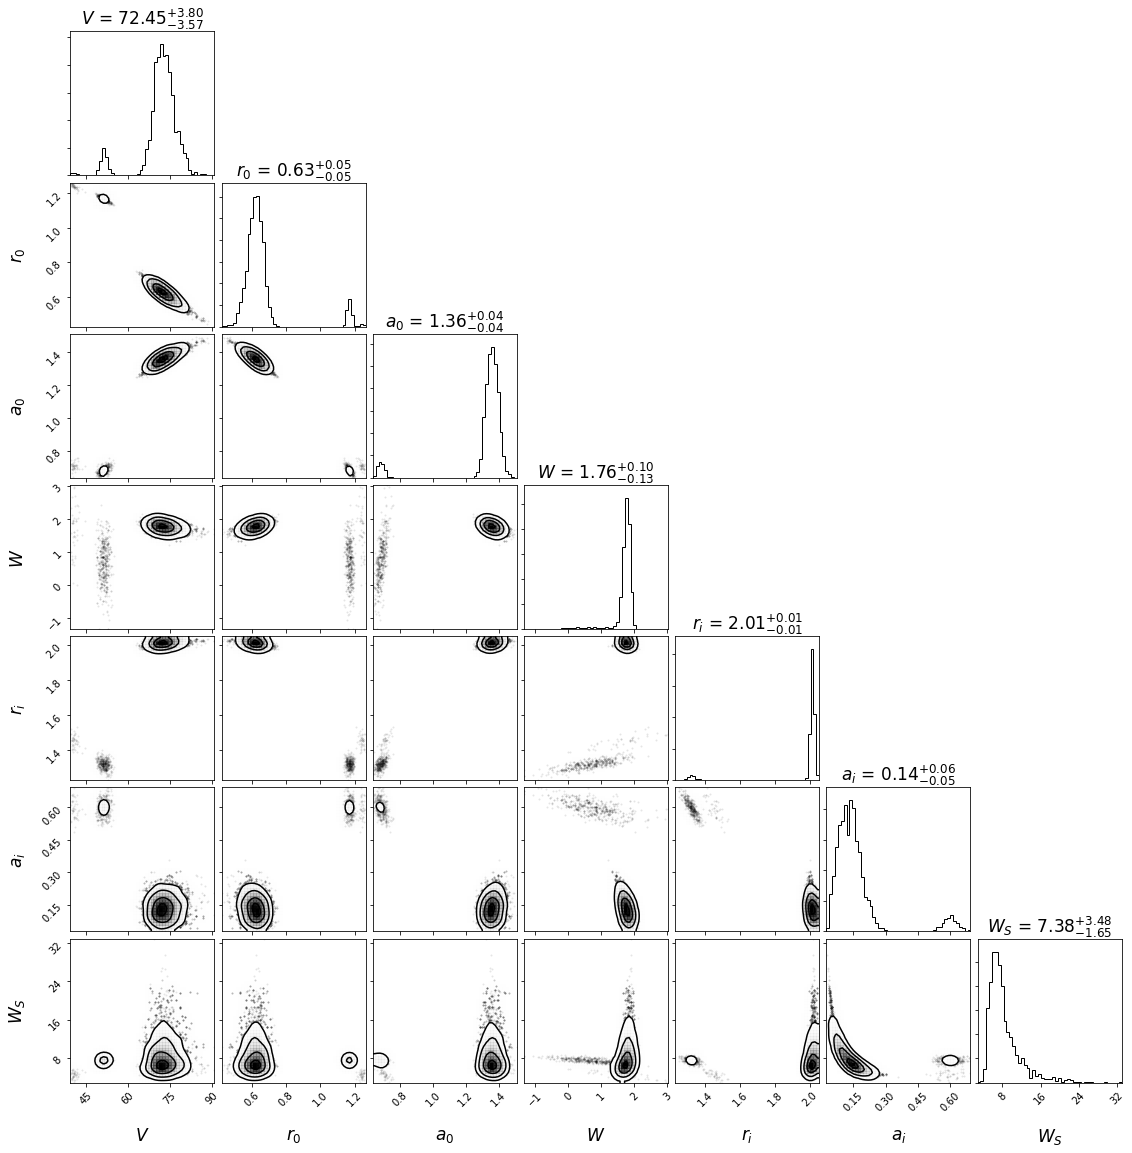

In [14]:
labels = ['$V$', '$r_0$', '$a_0$', '$W$', '$r_i$', '$a_i$', '$W_S$']
p = corner.corner(s, bins=50, smooth=1.5, labels=labels,
                  show_titles=True, title_kwargs={'fontsize':17.0},
                  label_kwargs={'fontsize':17.0})
